In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syste

In [ ]:
from tqdm.auto import tqdm
from datasets import load_dataset
from transformers import AutoTokenizer
from tokenizers import Tokenizer, models, trainers
from tokenizers.normalizers import NFKC
from tokenizers.pre_tokenizers import Whitespace
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

plt.style.use('ggplot')

In [ ]:
ds = load_dataset("WhereIsAI/github-issue-similarity", "default")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/50.1M [00:00<?, ?B/s]

valid-00000-of-00001.parquet:   0%|          | 0.00/4.22M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.77M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/18565 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/1547 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1548 [00:00<?, ? examples/s]

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['text1', 'text2', 'label'],
        num_rows: 18565
    })
    valid: Dataset({
        features: ['text1', 'text2', 'label'],
        num_rows: 1547
    })
    test: Dataset({
        features: ['text1', 'text2', 'label'],
        num_rows: 1548
    })
})


In [ ]:
ds["train"] = ds["train"].filter(lambda x: x["text1"] != "" and x["text2"] != "")
ds["valid"] = ds["valid"].filter(lambda x: x["text1"] != "" and x["text2"] != "")
ds["test"] = ds["test"].filter(lambda x: x["text1"] != "" and x["text2"] != "")

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text1', 'text2', 'label'],
        num_rows: 18426
    })
    valid: Dataset({
        features: ['text1', 'text2', 'label'],
        num_rows: 1538
    })
    test: Dataset({
        features: ['text1', 'text2', 'label'],
        num_rows: 1539
    })
})

In [ ]:
texts = []

for split in tqdm(["train", "valid", "test"]):
    texts.extend(ds[split]["text1"])
    texts.extend(ds[split]["text2"])

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(len(texts))

43006


In [ ]:
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
tokenizer.normalizer = NFKC()
tokenizer.pre_tokenizer = Whitespace()

In [ ]:
trainer = trainers.BpeTrainer(vocab_size=30522)
tokenizer.train_from_iterator(texts, trainer=trainer)

In [ ]:
tokenizer.save("perfect_tokenizer.json")

In [ ]:
tokenizer_perfect = Tokenizer.from_file("perfect_tokenizer.json")

In [ ]:
vocab = tokenizer.get_vocab()
print(len(vocab))

30522


In [ ]:
sample = ds["train"]["text1"][0]

print("Sample text:")
print("*"*80)
print(sample)
print("\n\n")
print("Encoded text:")
print("*"*80)
print(tokenizer.encode(sample).tokens)

Sample text:
********************************************************************************
<h3 dir="auto">Feature request</h3>
<p dir="auto">Whisper speech recognition without conditioning on previous text.<br>
As in <a href="https://github.com/openai/whisper/blob/7858aa9c08d98f75575035ecd6481f462d66ca27/whisper/transcribe.py#L278">https://github.com/openai/whisper/blob/7858aa9c08d98f75575035ecd6481f462d66ca27/whisper/transcribe.py#L278</a></p>
<h3 dir="auto">Motivation</h3>
<p dir="auto">Whisper implementation is great however conditioning the decoding on previous text can cause significant hallucination and repetitive text, e.g.:</p>
<blockquote>
<p dir="auto">"Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? 

In [ ]:
def get_n_tokens(sample, tokenizer, key="token_length"):
    try:
        return {
            f"{key}_text1": len(tokenizer.encode(sample["text1"], add_special_tokens=False).tokens),
            f"{key}_text2": len(tokenizer.encode(sample["text2"], add_special_tokens=False).tokens)
        }
    except:
        return {
            f"{key}_text1": len(tokenizer(sample["text1"], add_special_tokens=False).input_ids),
            f"{key}_text2": len(tokenizer(sample["text2"], add_special_tokens=False).input_ids)
        }


In [ ]:
ds = ds.map(lambda x: get_n_tokens(x, tokenizer_perfect), num_proc=8)

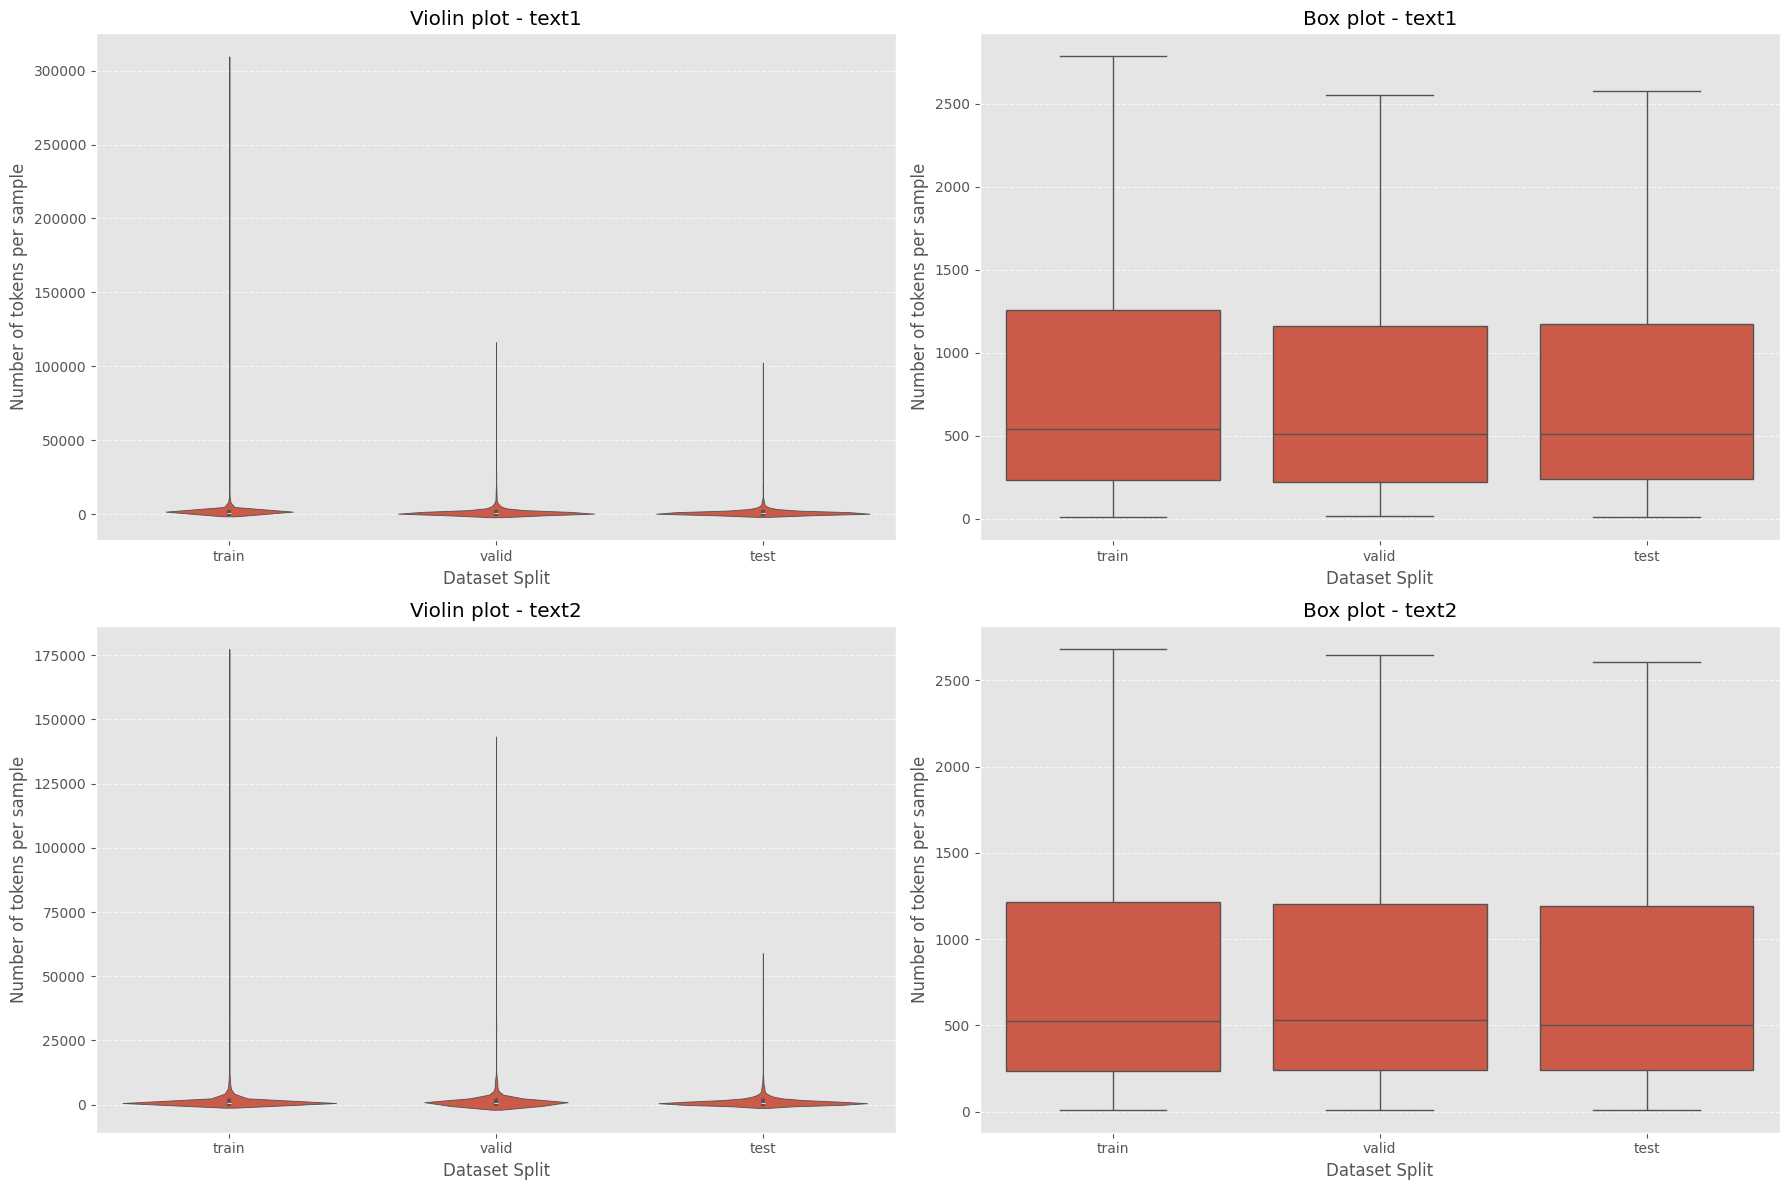

In [ ]:
data_text1 = []
labels_text1 = []
data_text2 = []
labels_text2 = []

for split in ["train", "valid", "test"]:
    data_text1.extend(ds[split]["token_length_text1"])
    labels_text1.extend([split] * len(ds[split]["token_length_text1"]))

    data_text2.extend(ds[split]["token_length_text2"])
    labels_text2.extend([split] * len(ds[split]["token_length_text2"]))

fig, axes = plt.subplots(2, 2, figsize=(18, 12), sharey=False)

sns.violinplot(x=labels_text1, y=data_text1, inner="box", ax=axes[0, 0])
axes[0, 0].set_xlabel("Dataset Split")
axes[0, 0].set_ylabel("Number of tokens per sample")
axes[0, 0].set_title("Violin plot - text1")
axes[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

sns.boxplot(x=labels_text1, y=data_text1, ax=axes[0, 1], showfliers=False)
axes[0, 1].set_xlabel("Dataset Split")
axes[0, 1].set_ylabel("Number of tokens per sample")
axes[0, 1].set_title("Box plot - text1")
axes[0, 1].grid(axis="y", linestyle="--", alpha=0.7)

sns.violinplot(x=labels_text2, y=data_text2, inner="box", ax=axes[1, 0])
axes[1, 0].set_xlabel("Dataset Split")
axes[1, 0].set_ylabel("Number of tokens per sample")
axes[1, 0].set_title("Violin plot - text2")
axes[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

sns.boxplot(x=labels_text2, y=data_text2, ax=axes[1, 1], showfliers=False)
axes[1, 1].set_xlabel("Dataset Split")
axes[1, 1].set_ylabel("Number of tokens per sample")
axes[1, 1].set_title("Box plot - text2")
axes[1, 1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

> SBERT based on the BERT architecture are not adapted here, because even with a perfect tokenizer, we will truncate the majority of the samples
> Thus we select good candidates based on the size of our sampled and the performances in MTEB

In [ ]:
models = {
    "Alibaba-NLP/gte-base-en-v1.5": 8192,
    # "jxm/cde-small-v2": 768,
    "bert-base-uncased": 512,  # The tokenizer used by cde-small-v2 is the same as bert-base-uncased (see hf repo)
    "NovaSearch/stella_en_400M_v5": 8192,
}

tokenizers = {model: AutoTokenizer.from_pretrained(model) for model in models}

In [ ]:
ds = ds.map(lambda x: get_n_tokens(x, tokenizers["Alibaba-NLP/gte-base-en-v1.5"], key="gte_token_length"), num_proc=8)
ds = ds.map(lambda x: get_n_tokens(x, tokenizers["bert-base-uncased"], key="cde_token_length"), num_proc=8)
ds = ds.map(lambda x: get_n_tokens(x, tokenizers["NovaSearch/stella_en_400M_v5"], key="stella_token_length"), num_proc=8)

Map (num_proc=8):   0%|          | 0/18426 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (35487 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (168205 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (37126 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (64934 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (64333 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum se

Map (num_proc=8):   0%|          | 0/1538 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (81903 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (46430 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (110440 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (50989 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (34943 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum se

Map (num_proc=8):   0%|          | 0/1539 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (90771 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (38117 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (76403 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (151604 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (62184 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum se

Map (num_proc=8):   0%|          | 0/18426 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (542 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (517 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1218 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1645 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Map (num_proc=8):   0%|          | 0/1538 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1096 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (662 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (800 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1593 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (727 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Map (num_proc=8):   0%|          | 0/1539 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (665 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (842 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (541 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (985 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (880 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Map (num_proc=8):   0%|          | 0/18426 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (35487 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (168205 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (37126 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (64934 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (64333 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum se

Map (num_proc=8):   0%|          | 0/1538 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (81903 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (46430 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (110440 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (50989 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (38596 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum se

Map (num_proc=8):   0%|          | 0/1539 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (38117 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (90771 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (151604 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (76403 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (62184 > 32768). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum se

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text1', 'text2', 'label', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2'],
        num_rows: 18426
    })
    valid: Dataset({
        features: ['text1', 'text2', 'label', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2'],
        num_rows: 1538
    })
    test: Dataset({
        features: ['text1', 'text2', 'label', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2'],
        num_rows: 1539
    })
})

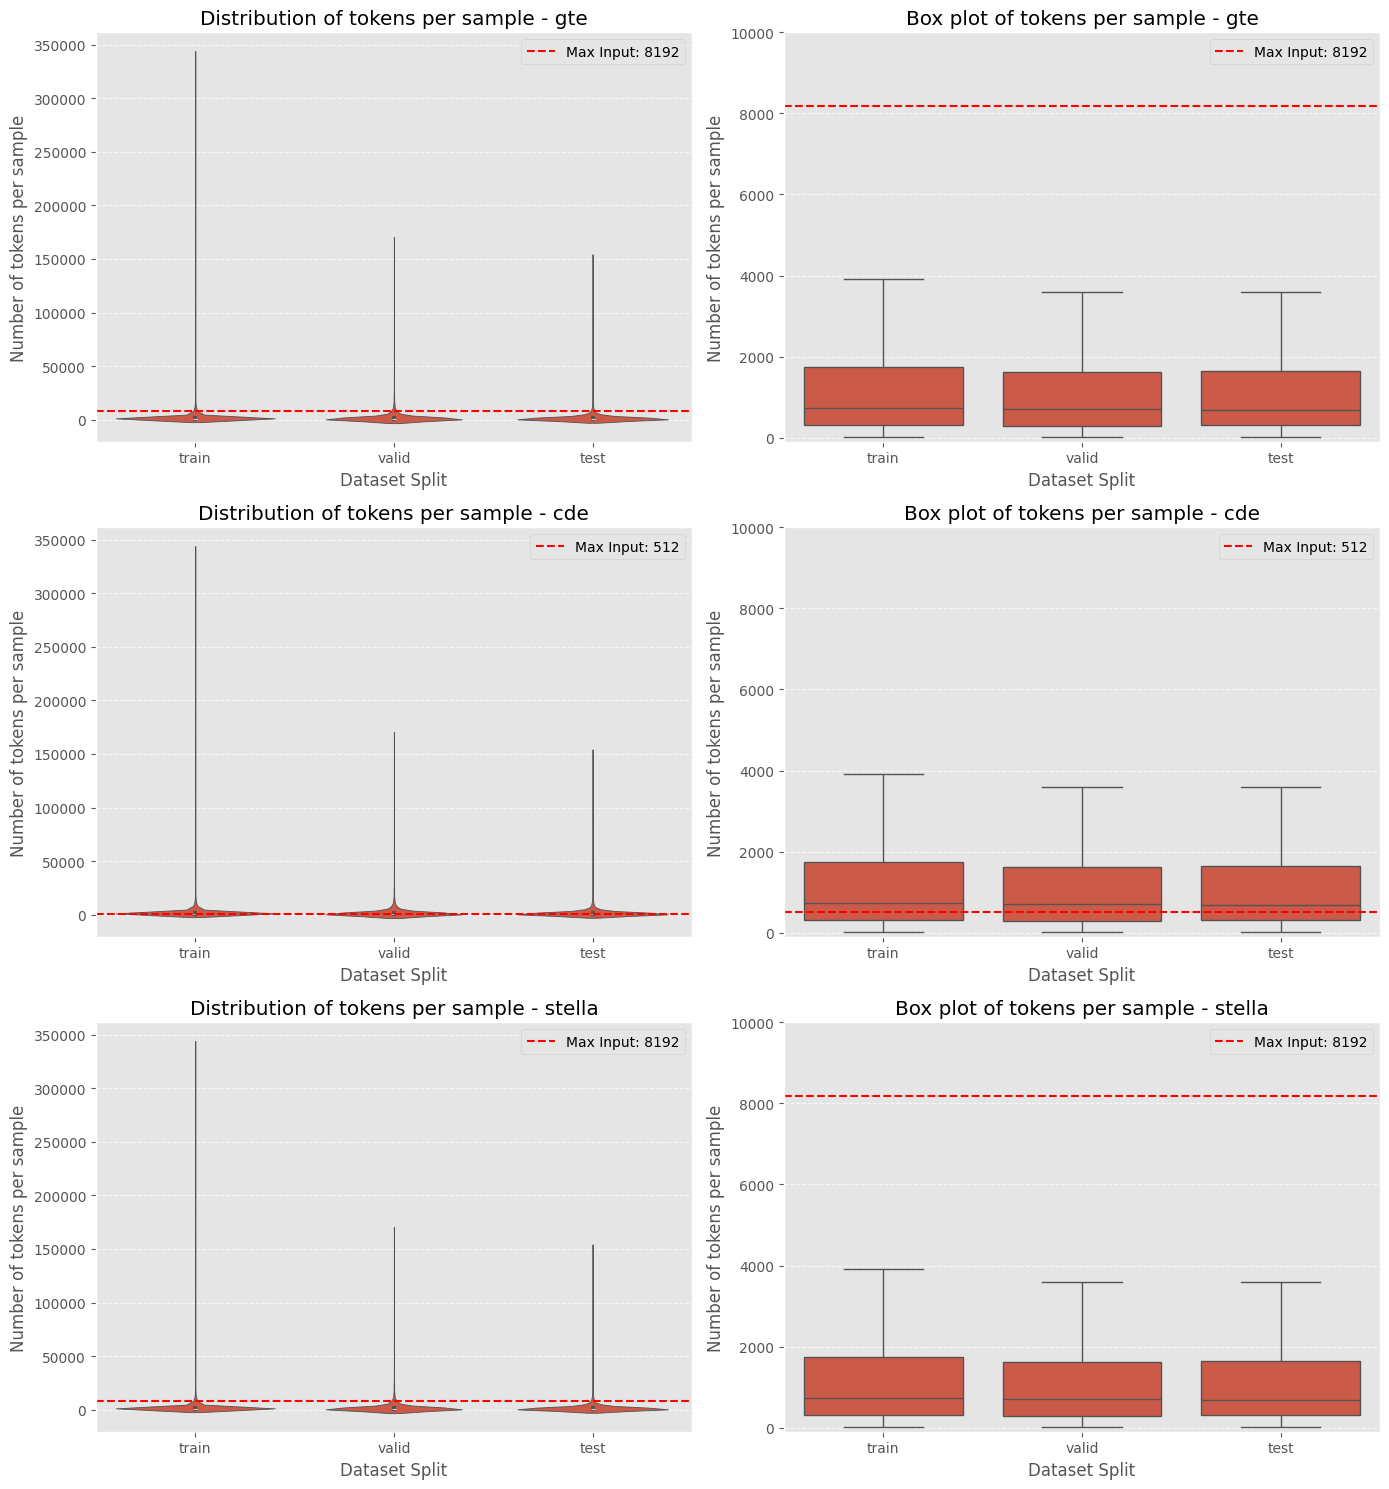

In [ ]:
models = {
    "gte": 8192,
    "cde": 512,
    "stella": 8192,
}

fig, axes = plt.subplots(len(models), 2, figsize=(14, 15), sharey=False)

for (model_key, max_length), ax in zip(models.items(), axes):
    data = []
    labels = []

    for split in ["train", "valid", "test"]:
        token_length_column = f"{model_key}_token_length_text1"

        data.extend(ds[split][token_length_column])
        labels.extend([split] * len(ds[split][token_length_column]))

    sns.violinplot(x=labels, y=data, inner="box", ax=ax[0])
    ax[0].axhline(y=max_length, color='r', linestyle='--', label=f"Max Input: {max_length}")
    ax[0].set_xlabel("Dataset Split")
    ax[0].set_ylabel("Number of tokens per sample")
    ax[0].set_title(f"Distribution of tokens per sample - {model_key}")
    ax[0].grid(axis="y", linestyle="--", alpha=0.7)
    ax[0].legend()

    sns.boxplot(x=labels, y=data, ax=ax[1], showfliers=False)
    ax[1].axhline(y=max_length, color='r', linestyle='--', label=f"Max Input: {max_length}")
    ax[1].set_xlabel("Dataset Split")
    ax[1].set_ylabel("Number of tokens per sample")
    ax[1].set_title(f"Box plot of tokens per sample - {model_key}")
    ax[1].set_ylim(-100, 10000)
    ax[1].grid(axis="y", linestyle="--", alpha=0.7)
    ax[1].legend()

plt.tight_layout()
plt.show()

> As we can see, for each dataset with a max context size of 512 tokens we cover less than 25 % of the samples, so truncate the sequences can lead to a lost of information  
> But as we can see, with 8192 we won't truncate the large majority of the samples  

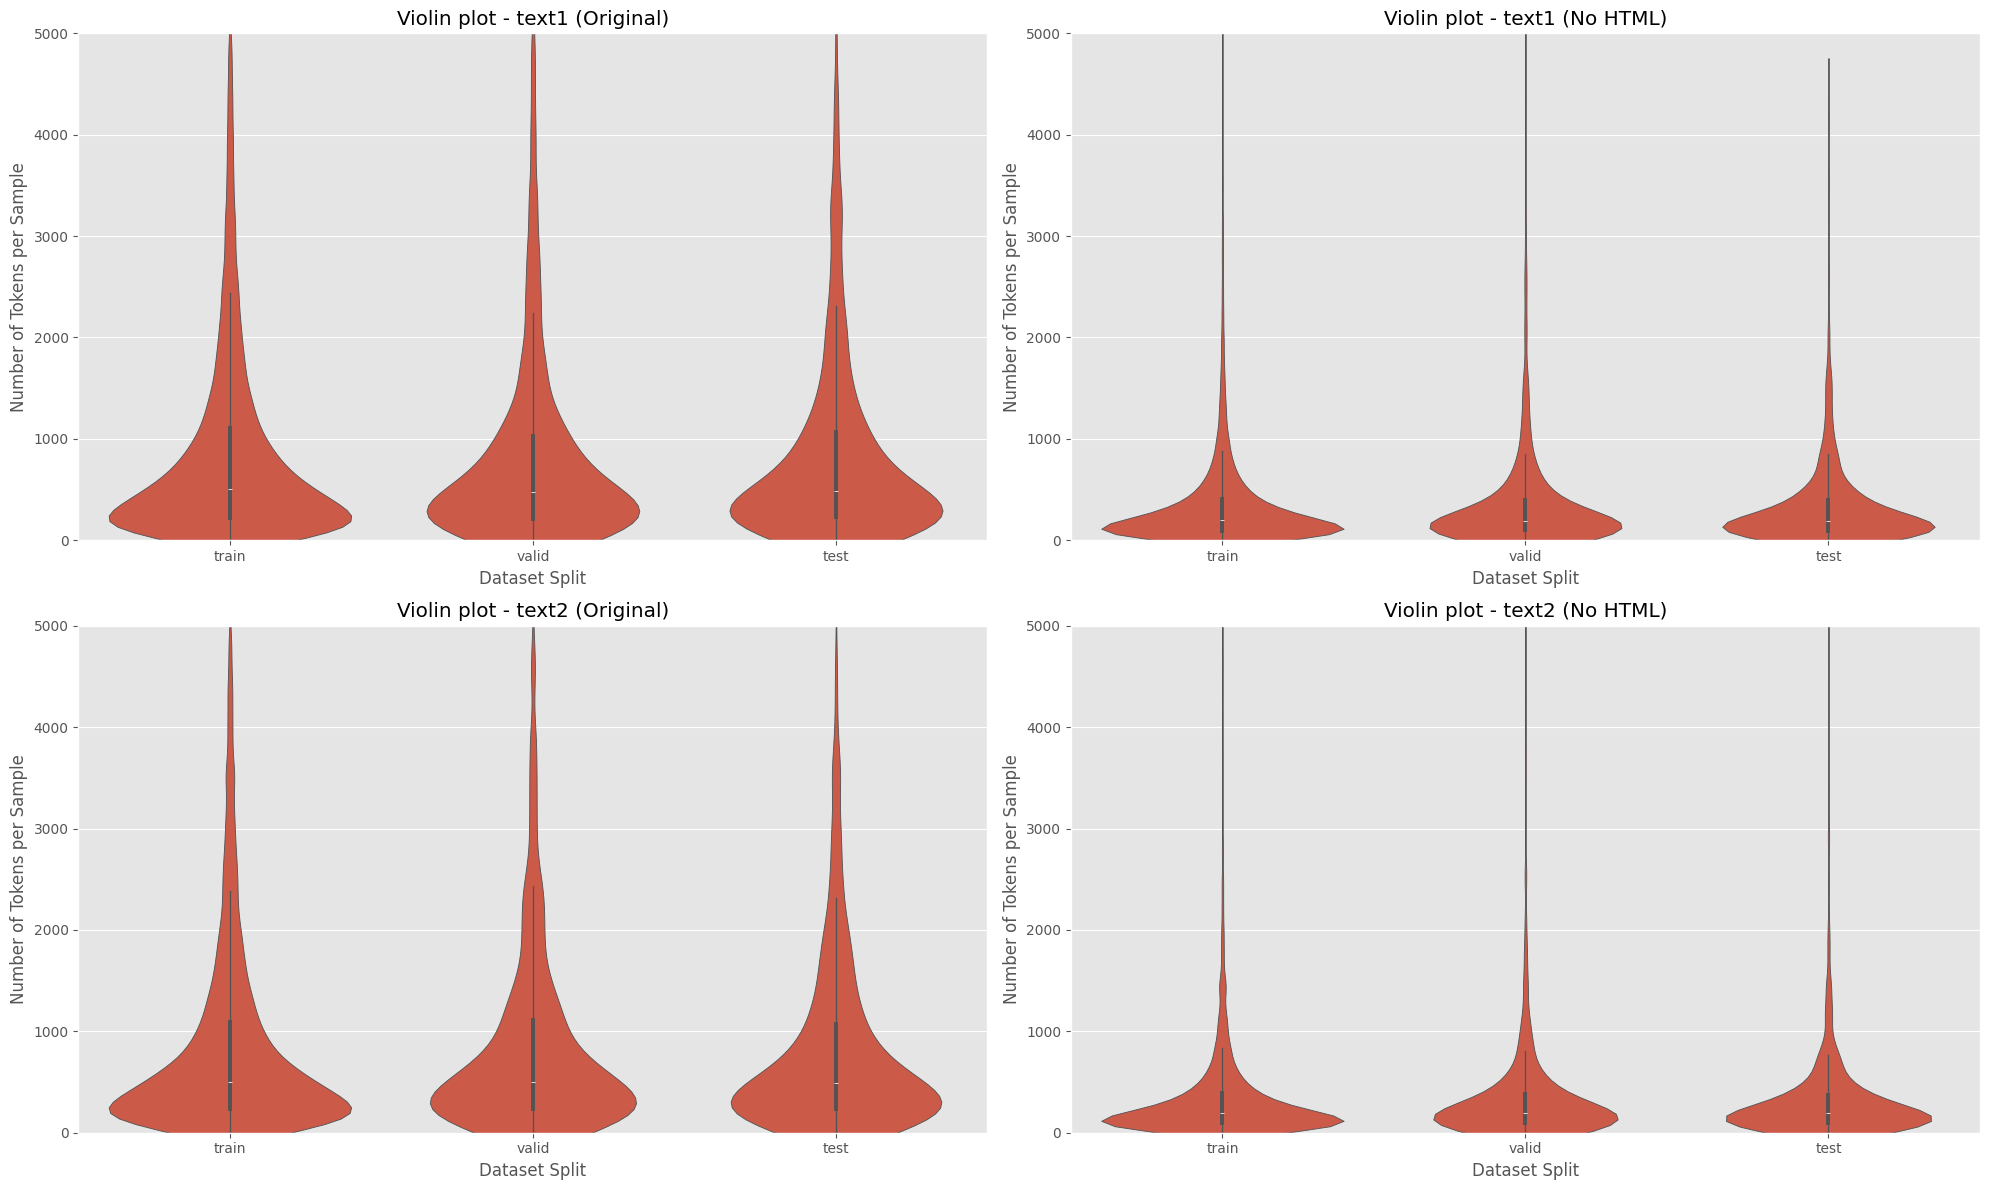

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datasets import load_dataset
from bs4 import BeautifulSoup
from tqdm.auto import tqdm
from tokenizers import Tokenizer, models, trainers
from tokenizers.normalizers import NFKC
from tokenizers.pre_tokenizers import Whitespace

# Load the dataset
ds = load_dataset("WhereIsAI/github-issue-similarity", "default")

# 1. Filter empty text pairs
ds["train"] = ds["train"].filter(lambda x: x["text1"] != "" and x["text2"] != "")
ds["valid"] = ds["valid"].filter(lambda x: x["text1"] != "" and x["text2"] != "")
ds["test"] = ds["test"].filter(lambda x: x["text1"] != "" and x["text2"] != "")

# HTML Removal Function
def remove_html_tags(text):
    """Removes HTML tags from a string."""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Apply HTML removal
for split in ds.keys():
    ds[split] = ds[split].map(lambda example: {
        "text1_nohtml": remove_html_tags(example["text1"]),
        "text2_nohtml": remove_html_tags(example["text2"])
    })

# Tokenization and length calculation (define tokenizer first as in your notebook)
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))
tokenizer.normalizer = NFKC()
tokenizer.pre_tokenizer = Whitespace()

# Extract all texts into a single list from the Dataset
texts = []

for split in ["train", "valid", "test"]:
  texts.extend(ds[split]["text1"])
  texts.extend(ds[split]["text2"])
  texts.extend(ds[split]["text1_nohtml"])
  texts.extend(ds[split]["text2_nohtml"])

trainer = trainers.BpeTrainer(vocab_size=30522)
tokenizer.train_from_iterator(texts, trainer=trainer)
tokenizer.save("perfect_tokenizer.json")
tokenizer_perfect = Tokenizer.from_file("perfect_tokenizer.json")

def get_n_tokens(sample, tokenizer, key="token_length"):
    try:
        return {
            f"{key}_text1": len(tokenizer.encode(sample["text1"], add_special_tokens=False).tokens),
            f"{key}_text2": len(tokenizer.encode(sample["text2"], add_special_tokens=False).tokens),
            f"{key}_text1_nohtml": len(tokenizer.encode(sample["text1_nohtml"], add_special_tokens=False).tokens),
            f"{key}_text2_nohtml": len(tokenizer.encode(sample["text2_nohtml"], add_special_tokens=False).tokens)
        }
    except:
        return {
            f"{key}_text1": len(tokenizer(sample["text1"], add_special_tokens=False).input_ids),
            f"{key}_text2": len(tokenizer(sample["text2"], add_special_tokens=False).input_ids),
            f"{key}_text1_nohtml": len(tokenizer(sample["text1_nohtml"], add_special_tokens=False).input_ids),
            f"{key}_text2_nohtml": len(tokenizer(sample["text2_nohtml"], add_special_tokens=False).input_ids)
        }
# Tokenize and compute lengths
for split in ds.keys():
    ds[split] = ds[split].map(lambda x: get_n_tokens(x, tokenizer_perfect))

# Convert to Pandas DataFrame
df_train = ds["train"].to_pandas()
df_valid = ds["valid"].to_pandas()
df_test = ds["test"].to_pandas()

df = pd.concat([df_train, df_valid, df_test])
df["split"] = ["train"] * len(df_train) + ["valid"] * len(df_valid) + ["test"] * len(df_test)  # Mark the splits

# Set a reasonable upper bound for token length (clip outliers)
upper_bound = 2500  # Adjust this based on your data exploration

# Plotting function (modified)
def plot_token_length_distributions(df, text_column, title, plot_type="violin", upper_bound=None, ax=None):
    """Plots the distribution of token lengths using violin plots or box plots.

    Args:
        df: Pandas DataFrame containing the data.
        text_column: Name of the column containing token lengths (e.g., 'token_length_text1').
        title: Title of the plot.
        plot_type: "violin" or "box" to specify the type of plot.
        upper_bound: Optional upper limit for the y-axis (clips outliers).
        ax: matplotlib Axes object to plot on. If None, a new figure is created.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed

    if upper_bound:
        df_plot = df[df[text_column] <= upper_bound]  # Use df_plot in subsequent sns calls
        sns.violinplot(x="split", y=text_column, data=df_plot, ax=ax)
        ax.set_ylim(0, upper_bound)
    else:
        sns.violinplot(x="split", y=text_column, data=df, ax=ax)

    ax.set_xlabel("Dataset Split")
    ax.set_ylabel("Number of Tokens per Sample")
    ax.set_title(title)


# Example usage (generating the plots)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))  # Create a 2x2 grid of subplots
upper_bound=5000
# Plot the distributions in the subplots
plot_token_length_distributions(df, "token_length_text1", "Violin plot - text1 (Original)", upper_bound=upper_bound, ax=axes[0, 0])
plot_token_length_distributions(df, "token_length_text1_nohtml", "Violin plot - text1 (No HTML)", upper_bound=upper_bound, ax=axes[0, 1])
plot_token_length_distributions(df, "token_length_text2", "Violin plot - text2 (Original)", upper_bound=upper_bound, ax=axes[1, 0])
plot_token_length_distributions(df, "token_length_text2_nohtml", "Violin plot - text2 (No HTML)", upper_bound=upper_bound, ax=axes[1, 1])

plt.tight_layout()  # Adjust layout to prevent overlapping titles/labels
plt.show()


In [ ]:
np.corrcoef(ds["train"]["gte_token_length_text1"], ds["train"]["cde_token_length_text1"])

array([[1., 1.],
       [1., 1.]])

> The three models are using the `bert-base-uncased` vocab, so we can compare the alignement of the our training set with training set used for pre-training this model (trick)

In [ ]:
print(ds["train"][0])
print(ds["train"][1])
print(ds["train"][2001])
print(ds["train"][432])

{'text1': '<h3 dir="auto">Feature request</h3>\n<p dir="auto">Whisper speech recognition without conditioning on previous text.<br>\nAs in <a href="https://github.com/openai/whisper/blob/7858aa9c08d98f75575035ecd6481f462d66ca27/whisper/transcribe.py#L278">https://github.com/openai/whisper/blob/7858aa9c08d98f75575035ecd6481f462d66ca27/whisper/transcribe.py#L278</a></p>\n<h3 dir="auto">Motivation</h3>\n<p dir="auto">Whisper implementation is great however conditioning the decoding on previous text can cause significant hallucination and repetitive text, e.g.:</p>\n<blockquote>\n<p dir="auto">"Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice?"</

> There is a lot of HTML tags, we can remove them with a regex or or bs4 (better)

In [ ]:
def remove_html_tags(sample):
    sample["text1"] = BeautifulSoup(sample["text1"], "html.parser").get_text().strip()
    sample["text2"] = BeautifulSoup(sample["text2"], "html.parser").get_text().strip()
    return sample

In [ ]:
sample = ds["train"][0]

print("Sample text:")
print("*"*80)
print(sample["text1"])
print("\n\n")
print("Text without HTML tags:")
print("*"*80)
print(remove_html_tags(sample)["text1"])

Sample text:
********************************************************************************
<h3 dir="auto">Feature request</h3>
<p dir="auto">Whisper speech recognition without conditioning on previous text.<br>
As in <a href="https://github.com/openai/whisper/blob/7858aa9c08d98f75575035ecd6481f462d66ca27/whisper/transcribe.py#L278">https://github.com/openai/whisper/blob/7858aa9c08d98f75575035ecd6481f462d66ca27/whisper/transcribe.py#L278</a></p>
<h3 dir="auto">Motivation</h3>
<p dir="auto">Whisper implementation is great however conditioning the decoding on previous text can cause significant hallucination and repetitive text, e.g.:</p>
<blockquote>
<p dir="auto">"Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? Do you have malpractice? 

In [ ]:
ds = ds.map(remove_html_tags, num_proc=8)

Map (num_proc=8):   0%|          | 0/18426 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1538 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1539 [00:00<?, ? examples/s]

In [ ]:
ds = ds.map(lambda x: get_n_tokens(x, tokenizer_perfect, key="token_length_cleaned"), num_proc=8)

Map (num_proc=8):   0%|          | 0/18426 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1538 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1539 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text1', 'text2', 'label', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2', 'token_length_cleaned_text1', 'token_length_cleaned_text2'],
        num_rows: 18426
    })
    valid: Dataset({
        features: ['text1', 'text2', 'label', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2', 'token_length_cleaned_text1', 'token_length_cleaned_text2'],
        num_rows: 1538
    })
    test: Dataset({
        features: ['text1', 'text2', 'label', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2', 'token_length_cleaned_text1', 'token_length_cleaned_text2'],
        num_rows: 1539
    })
})

In [ ]:
def summarize_dataset(ds):
    """
    Calculates and prints summary statistics for the dataset.

    Args:
        ds: A Hugging Face Dataset object.
    """
    print("Dataset Summary:")
    print("-" * 20)

    # Number of examples per split
    print(f"Number of training examples: {len(ds['train'])}")
    print(f"Number of validation examples: {len(ds['valid'])}")
    print(f"Number of test examples: {len(ds['test'])}")

    # Label Distribution
    print("\nLabel Distribution:")
    print("-" * 20)
    train_labels = ds['train']['label']
    valid_labels = ds['valid']['label']
    test_labels = ds['test']['label']
    print(f"Training set: {pd.Series(train_labels).value_counts(normalize=True)}")
    print(f"Validation set: {pd.Series(valid_labels).value_counts(normalize=True)}")
    print(f"Test set: {pd.Series(test_labels).value_counts(normalize=True)}")

    # Average token length
    def get_avg_token_length(split):
        text1_lengths = ds[split]['token_length_cleaned_text1']
        text2_lengths = ds[split]['token_length_cleaned_text2']
        all_lengths = text1_lengths + text2_lengths
        return sum(all_lengths) / len(all_lengths)

    print("\nAverage Token Length:")
    print("-" * 20)
    print(f"Training set: {get_avg_token_length('train'):.2f}")
    print(f"Validation set: {get_avg_token_length('valid'):.2f}")
    print(f"Test set: {get_avg_token_length('test'):.2f}")

# Example usage:
summarize_dataset(ds)


Dataset Summary:
--------------------
Number of training examples: 18426
Number of validation examples: 1538
Number of test examples: 1539

Label Distribution:
--------------------
Training set: 1    0.508575
0    0.491425
Name: proportion, dtype: float64
Validation set: 0    0.501951
1    0.498049
Name: proportion, dtype: float64
Test set: 1    0.519818
0    0.480182
Name: proportion, dtype: float64

Average Token Length:
--------------------
Training set: 540.48
Validation set: 516.90
Test set: 452.22


In [ ]:
print(ds["train"]["text1"][2136])

In [ ]:
raw_data = []
raw_labels = []
clean_data = []
clean_labels = []

for split in ["train", "valid", "test"]:
    raw_data.extend(ds[split]["token_length_text1"])
    raw_labels.extend([split] * len(ds[split]["token_length_text1"]))

    clean_data.extend(ds[split]["token_length_cleaned_text1"])
    clean_labels.extend([split] * len(ds[split]["token_length_cleaned_text1"]))

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(x=raw_labels, y=raw_data, ax=axes[0], showfliers=False)
axes[0].set_title("Token Lengths Before Cleaning")
axes[0].set_xlabel("Dataset Split")
axes[0].set_ylabel("Number of Tokens per Sample")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

sns.boxplot(x=clean_labels, y=clean_data, ax=axes[1], showfliers=False)
axes[1].set_title("Token Lengths After Cleaning")
axes[1].set_xlabel("Dataset Split")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
# let's look with the bert tokenizer
ds = ds.map(lambda x: get_n_tokens(x, tokenizers["bert-base-uncased"], key="bert_token_length_cleaned"), num_proc=8)

In [ ]:
raw_data = []
raw_labels = []
clean_data = []
clean_labels = []

for split in ["train", "valid", "test"]:
    raw_data.extend(ds[split]["cde_token_length_text1"])
    raw_labels.extend([split] * len(ds[split]["cde_token_length_text1"]))

    clean_data.extend(ds[split]["bert_token_length_cleaned_text1"])
    clean_labels.extend([split] * len(ds[split]["bert_token_length_cleaned_text1"]))

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(x=raw_labels, y=raw_data, ax=axes[0], showfliers=False)
axes[0].set_title("Token Lengths Before Cleaning (BERT Tokenizer)")
axes[0].axhline(y=512, color='r', linestyle='--', label=f"Max Input: 512")
axes[0].axhline(y=8192, color='g', linestyle='--', label=f"Max Input: 8192")
axes[0].set_xlabel("Dataset Split")
axes[0].set_ylabel("Number of Tokens per Sample")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

sns.boxplot(x=clean_labels, y=clean_data, ax=axes[1], showfliers=False)
axes[1].set_title("Token Lengths After Cleaning (BERT Tokenizer)")
axes[1].axhline(y=512, color='r', linestyle='--', label=f"Max Input: 512")
axes[1].axhline(y=8192, color='g', linestyle='--', label=f"Max Input: 8192")
axes[1].set_xlabel("Dataset Split")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].legend(loc="upper left")

plt.tight_layout()
plt.show()

> By removing all these useless tags, the size of the samples decreased consequently. Thanks to this preprocessing, a max context of 512 correspong now to the Q3, meaning that 75% of the samples have a size lower

In [ ]:
train_df = ds["train"].to_pandas()
valid_df = ds["valid"].to_pandas()
test_df = ds["test"].to_pandas()

train_df.to_csv("../data/train.csv", index=False)
valid_df.to_csv("../data/valid.csv", index=False)
test_df.to_csv("../data/test.csv", index=False)

In [ ]:
ds = load_dataset("csv", data_files={"train": "../data/train.csv", "valid": "../data/valid.csv", "test": "../data/test.csv"})

In [ ]:
texts = []

for split in ["train", "valid", "test"]:
    texts.extend(ds[split]["text1"])
    texts.extend(ds[split]["text2"])

In [ ]:
texts = [text for text in texts if text]

In [ ]:
def estimate_vocab_richness(texts, tokenizer, step_size=100):
    seen_tokens = set()
    new_tokens_per_step = []

    for i in tqdm(range(0, len(texts), step_size)):
        batch = texts[i:i+step_size]
        tokens = tokenizer.batch_encode_plus(batch, add_special_tokens=False)["input_ids"]
        tokens = set([token for sublist in tokens for token in sublist])
        new_tokens = tokens - seen_tokens
        new_tokens_per_step.append(len(new_tokens))
        seen_tokens.update(new_tokens)

    return new_tokens_per_step

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

new_tokens_per_step = estimate_vocab_richness(texts, tokenizer, step_size=10)

  0%|          | 0/4311 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (2083 > 512). Running this sequence through the model will result in indexing errors


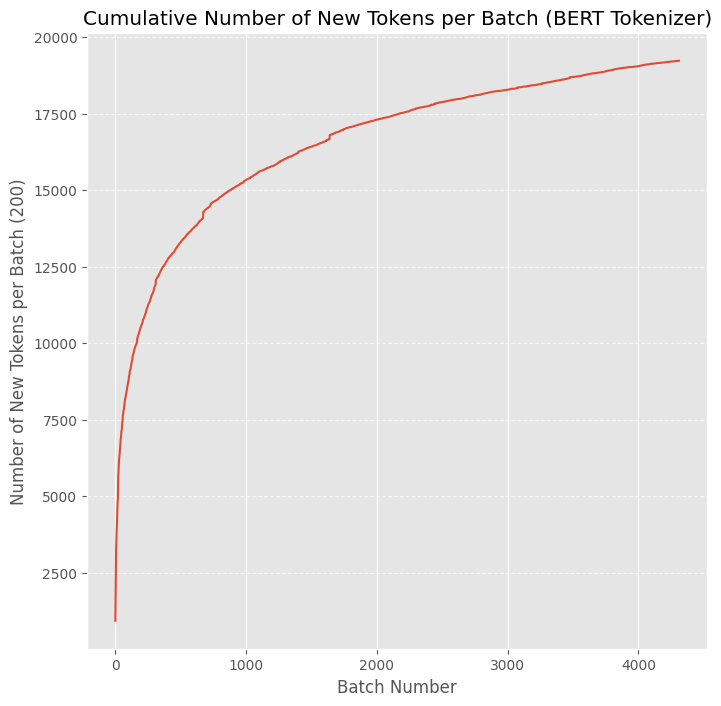

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(np.cumsum(new_tokens_per_step))

plt.xlabel("Batch Number")
plt.ylabel("Number of New Tokens per Batch (200)")
plt.title("Cumulative Number of New Tokens per Batch (BERT Tokenizer)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

> Let's try to compare some tokenizers using the same algorithm (BPE), we will pick them on MTEB and make sure that they don't have the same vocabulary

In [ ]:
tokenizer_nv = AutoTokenizer.from_pretrained("nvidia/NV-Embed-v2")
tokenizer_gte = AutoTokenizer.from_pretrained("Alibaba-NLP/gte-Qwen2-7B-instruct")
tokenizer_bge = AutoTokenizer.from_pretrained("BAAI/bge-multilingual-gemma2")

In [ ]:
print(tokenizer_nv.backend_tokenizer.model)
print(tokenizer_gte.backend_tokenizer.model)
print(tokenizer_bge.backend_tokenizer.model)

BPE(dropout=None, unk_token="<unk>", continuing_subword_prefix=None, end_of_word_suffix=None, fuse_unk=True, byte_fallback=True, ignore_merges=False, vocab={"<unk>":0, "<s>":1, "</s>":2, "<0x00>":3, "<0x01>":4, ...}, merges=[("▁", "t"), ("i", "n"), ("e", "r"), ("▁", "a"), ("h", "e"), ...])
BPE(dropout=None, unk_token=None, continuing_subword_prefix="", end_of_word_suffix="", fuse_unk=False, byte_fallback=False, ignore_merges=False, vocab={"!":0, """:1, "#":2, "$":3, "%":4, ...}, merges=[("Ġ", "Ġ"), ("ĠĠ", "ĠĠ"), ("i", "n"), ("Ġ", "t"), ("ĠĠĠĠ", "ĠĠĠĠ"), ...])
BPE(dropout=None, unk_token="<unk>", continuing_subword_prefix=None, end_of_word_suffix=None, fuse_unk=True, byte_fallback=True, ignore_merges=False, vocab={"<pad>":0, "<eos>":1, "<bos>":2, "<unk>":3, "<mask>":4, ...}, merges=[("
", "
"), ("
", "

"), ("

", "
"), ("
", "


"), ("

", "

"), ...])


In [ ]:
new_tokens_per_step_nv = estimate_vocab_richness(texts, tokenizer_nv, step_size=10)
new_tokens_per_step_bge = estimate_vocab_richness(texts, tokenizer_bge, step_size=10)
new_tokens_per_step_gte = estimate_vocab_richness(texts, tokenizer_gte, step_size=10)

  0%|          | 0/4311 [00:00<?, ?it/s]

  0%|          | 0/4311 [00:00<?, ?it/s]

  0%|          | 0/4311 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (43553 > 32768). Running this sequence through the model will result in indexing errors


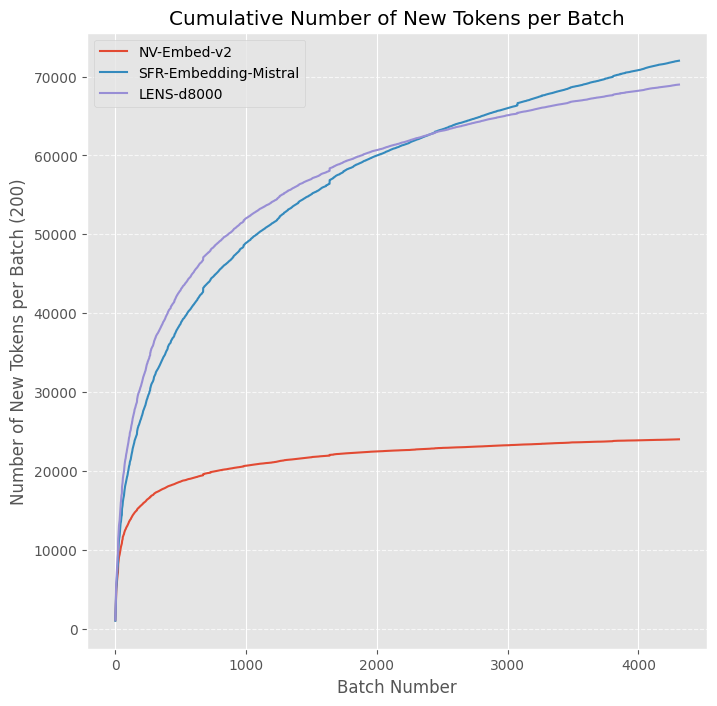

In [ ]:
plt.figure(figsize=(8, 8))

plt.plot(np.cumsum(new_tokens_per_step_nv), label="NV-Embed-v2")
plt.plot(np.cumsum(new_tokens_per_step_bge), label="SFR-Embedding-Mistral")
plt.plot(np.cumsum(new_tokens_per_step_gte), label="LENS-d8000")

plt.xlabel("Batch Number")
plt.ylabel("Number of New Tokens per Batch (200)")
plt.title("Cumulative Number of New Tokens per Batch")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

plt.show()

> We have different behaviour, NVEMbed seems to platau largely faster than the tow others. We can already make an assumption, BPE split the words, more we split less the tokenizer know our corpus. So what we can suppose here, is that with NV-Embed, we split a lot the corpus because our vocab is not really aligned and this leads to have the same tokens batch after batch

> Let's see this statistically

In [ ]:
nv_numb = {
    "n_tokens": [],
    "n_chars": []
}

bge_numb = {
    "n_tokens": [],
    "n_chars": []
}

gte_numb = {
    "n_tokens": [],
    "n_chars": []
}

for text in tqdm(texts[:4000]):
    nv_numb["n_tokens"].append(len(tokenizer_nv(text)["input_ids"]))
    nv_numb["n_chars"].append(len(text))

    bge_numb["n_tokens"].append(len(tokenizer_bge(text)["input_ids"]))
    bge_numb["n_chars"].append(len(text))

    gte_numb["n_tokens"].append(len(tokenizer_gte(text)["input_ids"]))
    gte_numb["n_chars"].append(len(text))

  0%|          | 0/4000 [00:00<?, ?it/s]

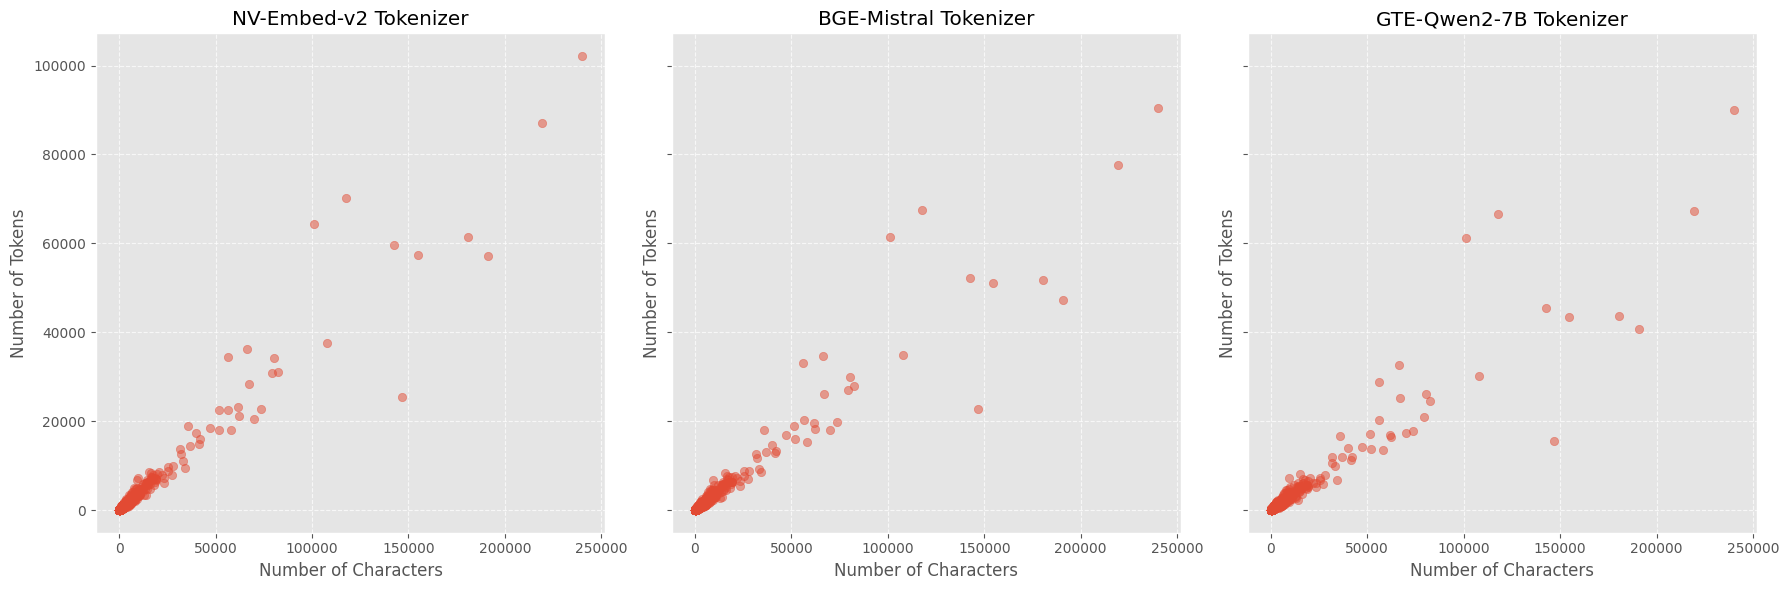

In [ ]:
# we plot the number of tokens vs the number of characters
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)

axes[0].scatter(nv_numb["n_chars"], nv_numb["n_tokens"], alpha=0.5)
axes[0].set_title("NV-Embed-v2 Tokenizer")
axes[0].set_xlabel("Number of Characters")
axes[0].set_ylabel("Number of Tokens")
axes[0].grid(axis="both", linestyle="--", alpha=0.7)

axes[1].scatter(bge_numb["n_chars"], bge_numb["n_tokens"], alpha=0.5)
axes[1].set_title("BGE-Mistral Tokenizer")
axes[1].set_xlabel("Number of Characters")
axes[1].set_ylabel("Number of Tokens")
axes[1].grid(axis="both", linestyle="--", alpha=0.7)

axes[2].scatter(gte_numb["n_chars"], gte_numb["n_tokens"], alpha=0.5)
axes[2].set_title("GTE-Qwen2-7B Tokenizer")
axes[2].set_xlabel("Number of Characters")
axes[2].set_ylabel("Number of Tokens")
axes[2].grid(axis="both", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

> Plots are very similar

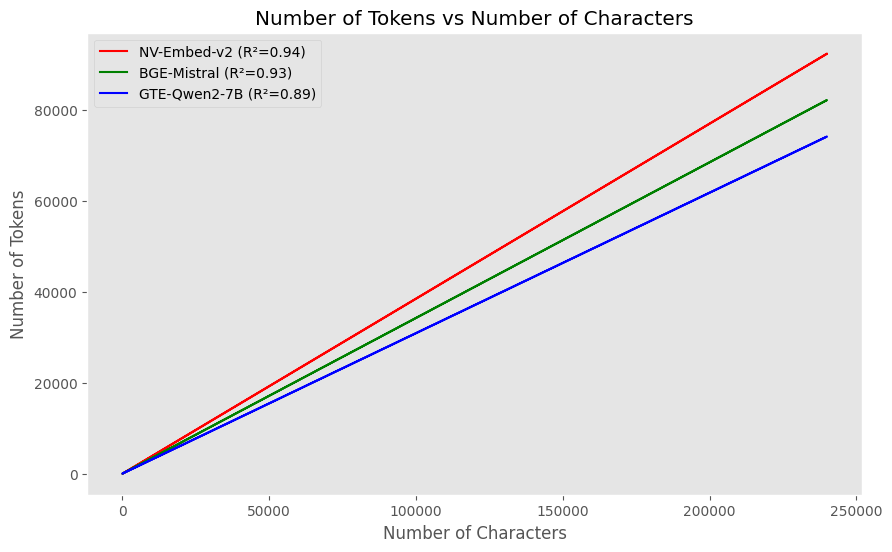

In [ ]:
nv_df = pd.DataFrame(nv_numb)
bge_df = pd.DataFrame(bge_numb)
gte_df = pd.DataFrame(gte_numb)

def linear_regression(df, label, color):
    x = np.array(df["n_chars"])
    y = np.array(df["n_tokens"])

    slope, intercept, r_value, _, _ = stats.linregress(x, y)
    y_pred = slope * x + intercept

    plt.plot(x, y_pred, color=color, label=f"{label} (R²={r_value**2:.2f})")

plt.figure(figsize=(10, 6))

linear_regression(nv_df, "NV-Embed-v2", "r")
linear_regression(bge_df, "BGE-Mistral", "g")
linear_regression(gte_df, "GTE-Qwen2-7B", "b")

plt.xlabel("Number of Characters")
plt.ylabel("Number of Tokens")
plt.title("Number of Tokens vs Number of Characters")
plt.legend()
plt.grid()


plt.show()

> The tokenizer used for GTE seems to be the best because it don't split too muchthe whole corpus meaning that it's tokenizer training set set is aligned with our corpus (not certain, because of th R²)

> Unfortunately this model is too big for us and we won't be able to use it, but the idea with what I did here, is to show how you can have an a priori metric between models
based on the corpus used for training the tokenizer. Obviously, we talk about model having similar performances.

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['text1', 'text2', 'label', 'token_length_text1', 'token_length_text2', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2', 'token_length_cleaned_text1', 'token_length_cleaned_text2', 'bert_token_length_cleaned_text1', 'bert_token_length_cleaned_text2'],
        num_rows: 18565
    })
    valid: Dataset({
        features: ['text1', 'text2', 'label', 'token_length_text1', 'token_length_text2', 'gte_token_length_text1', 'gte_token_length_text2', 'cde_token_length_text1', 'cde_token_length_text2', 'stella_token_length_text1', 'stella_token_length_text2', 'token_length_cleaned_text1', 'token_length_cleaned_text2', 'bert_token_length_cleaned_text1', 'bert_token_length_cleaned_text2'],
        num_rows: 1547
    })
    test: Dataset({
        features: ['text1', 'text2', 'label', 'token_length_text1', 'token_length_text2', 'gte_to

In [ ]:
ds = ds.filter(lambda x: x["text1"] and x["text2"])

Filter:   0%|          | 0/18565 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1547 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1548 [00:00<?, ? examples/s]

In [ ]:
def get_number_of_unk(tokenizer, sample, key="n_unk"):
    return {
        key: tokenizer(sample["text1"], add_special_tokens=False)["input_ids"].count(tokenizer.unk_token_id) + tokenizer(sample["text2"], add_special_tokens=False)["input_ids"].count(tokenizer.unk_token_id)
    }

In [ ]:
ds = ds.map(lambda x: get_number_of_unk(tokenizer, x), num_proc=8)

Map (num_proc=8):   0%|          | 0/18387 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (590 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2083 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (707 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (903 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

Map (num_proc=8):   0%|          | 0/1535 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1438 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (964 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1617 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (808 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (598 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Map (num_proc=8):   0%|          | 0/1534 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (697 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (630 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (591 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2919 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (606 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

In [ ]:
total_unk_tokens = sum(ds["train"]["n_unk"]) + sum(ds["valid"]["n_unk"]) + sum(ds["test"]["n_unk"])
print(f"Total number of unknown tokens: {total_unk_tokens}")

Total number of unknown tokens: 41229


In [ ]:
cnt = 0
for i, sample in enumerate(ds["train"]):
    if sample["n_unk"] > 0:
        cnt += 1
        if cnt <= 3:
            print(sample['text1'])
            print("-"*80)
            print(tokenizer.tokenize(sample['text1']))
            print("-"*80)
            print(sample['text2'])
            print("-"*80)
            print(tokenizer.tokenize(sample['text2']))
            print("*"*80)
            print("*"*80)
        else:
            break

System info

Playwright Version: [v1.31.2]
Operating System: [Windows VM]
Browser: [ONLY in Chromium]
Other info: It used to work fine until updated to v1.31 and now even if I revert back to previous versions still getting the same error (the error only happens in the Windows VM , not in my local machine, but I do not have access to that VM Windows machine)

Error LOG
2023-03-07T09:27:22.6036536Z �  1) [testing Login Setup] › tests\login-setup.ts:6:5 › Login Setup �────────────────────────────────��
2023-03-07T09:27:22.6037617Z 
2023-03-07T09:27:22.6038162Z     browserType.launch: Browser closed.
2023-03-07T09:27:22.6038793Z     ==================== Browser output: ====================
2023-03-07T09:27:22.6044850Z     <launching> C:\devops-agents\agent\_work\r65\a\Project.Web.Test.Automation\Output\node_modules\playwright-core\.local-browsers\chromium_win64_special-1050\chrome-win\chrome.exe --disable-field-trial-config --disable-background-networking --enable-features=NetworkService,N

> We can see that some chars come from an other language, so we can try to compare this tokenizer with a multilingual one

In [ ]:
tokenizer_multilingual = AutoTokenizer.from_pretrained("intfloat/multilingual-e5-small")

tokenizer_config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [ ]:
print(tokenizer_multilingual.backend_tokenizer.model)

Unigram(unk_id=3, vocab=[("<s>", 0), ("<pad>", 0), ("</s>", 0), ("<unk>", 0), (",", -3.4635426998138428), ...], byte_fallback=False)


In [ ]:
ds = ds.map(lambda x: get_number_of_unk(tokenizer_multilingual, x, key="n_unk_multilingual"), num_proc=8)

Map (num_proc=8):   0%|          | 0/18387 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (589 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (576 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1948 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1029 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (906 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

Map (num_proc=8):   0%|          | 0/1535 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1523 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1416 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (929 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1057 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (911 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for 

Map (num_proc=8):   0%|          | 0/1534 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (717 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (3024 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (583 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (614 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (953 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for th

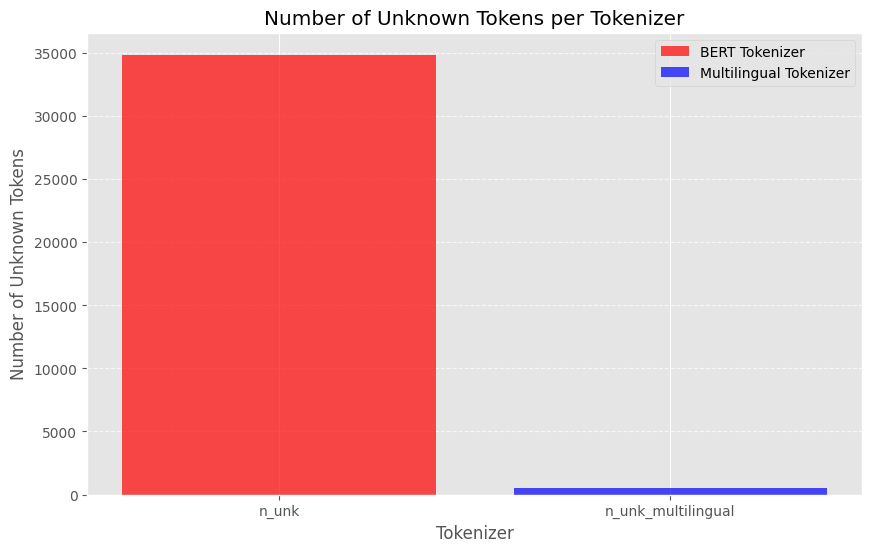

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar("n_unk", sum(ds["train"]["n_unk"]), color="r", alpha=0.7, label="BERT Tokenizer")
plt.bar("n_unk_multilingual", sum(ds["train"]["n_unk_multilingual"]), color="b", alpha=0.7, label="Multilingual Tokenizer")
plt.xlabel("Tokenizer")
plt.ylabel("Number of Unknown Tokens")
plt.title("Number of Unknown Tokens per Tokenizer")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

> According to this and also the vocab of the perfect tokenizer, we can consider that the corpus is not only in english